In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Insights

from all the algorithms
1. **ADABOOST** we got the accuracy of 86%
2. **GradientBoostingAlgo** we got the accuracy of 87%
3. **XGBClassifier** we got the accuracy of 88%
4. **LightgbmClassifier** we got finnaly the best accuracy score of 89%

so lets use the lightgbm algorithm for this project as the final model

# Modeling

In [3]:
#we got the paramaters from the gridsearch cv data
from lightgbm import LGBMClassifier

params = {'learning_rate': 0.75,
 'max_depth': 15,
 'num_leaves': 12,
 'reg_alpha': 0.01,
 'reg_lambda': 0.01,
 'subsample': 0.2}
model = LGBMClassifier(objective='binary',metric='logloss',is_unbalance=True,**params)


# EDA and Processing

In [6]:
data = pd.read_csv(r'D:\Parkinson_project\data\featured_data.csv')
data = data.drop('Unnamed: 0',axis=1)
data.head()

numPulses  GNE_NSR_SEO  mean_MFCC_1st_coef  mean_MFCC_6th_coef  \
0      240.0       3.0152              8.4781            -1.51440   
1      234.0       3.0600              8.5008            -1.67590   
2      232.0       3.0309              7.6362            -1.49290   
3      178.0       3.0293              6.7365            -0.65556   
4      236.0       3.0362              6.4634            -0.51876   

   std_MFCC_8th_coef  tqwt_energy_dec_27  tqwt_energy_dec_31  \
0            0.17101            0.108070            0.000007   
1            0.16785            0.098360            0.000015   
2            0.21901            0.106910            0.000026   
3            0.24529            0.002072            0.000207   
4            0.22090            0.001152            0.000166   

   tqwt_energy_dec_35  tqwt_entropy_shannon_dec_32  tqwt_TKEO_mean_dec_21  \
0            0.000001                     0.036109               0.010913   
1            0.000002                     0.068996               0.007092   
2            0.000004                     0.050766               0.002236   
3            0.000054                     4.267800               0.105100   
4            0.000028                     3.941400               0.118100   

   ...  tqwt_medianValue_dec_26  tqwt_medianValue_dec_34  \
0  ...            -2.220000e-17                -0.000202   
1  ...            -3.790000e-17                -0.000158   
2  ...            -1.580000e-17                -0.000136   
3  ...             1.105400e-03                -0.000313   
4  ...             8.909500e-03                 0.000663   

   tqwt_meanValue_dec_9  tqwt_meanValue_dec_11  tqwt_meanValue_dec_21  \
0          1.230000e-20          -1.630000e-20          -6.330000e-20   
1          2.030000e-20          -1.680000e-20           3.090000e-19   
2         -1.050000e-21           7.080000e-22           1.760000e-19   
3          2.940000e-20           5.630000e-20           7.780000e-19   
4         -1.170000e-20           1.280000e-20          -1.700000e-18   

   tqwt_meanValue_dec_26  tqwt_skewnessValue_dec_3  tqwt_skewnessValue_dec_21  \
0          -7.210000e-19              1.110000e-15              -4.470000e-17   
1           3.150000e-19             -3.290000e-15              -7.020000e-20   
2          -2.700000e-19             -3.420000e-15               1.200000e-16   
3          -2.340000e-18              6.455000e-02              -1.281100e-03   
4          -8.110000e-19             -4.187600e-03               3.441400e-03   

   tqwt_skewnessValue_dec_28  class  
0                  -0.102900    1.0  
1                  -0.005679    1.0  
2                  -0.003824    1.0  
3                   0.027619    1.0  
4                   0.011756    1.0  

[5 rows x 21 columns]

In [9]:
data['class'] = data['class'].astype('int64')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numPulses                    756 non-null    float64
 1   GNE_NSR_SEO                  756 non-null    float64
 2   mean_MFCC_1st_coef           756 non-null    float64
 3   mean_MFCC_6th_coef           756 non-null    float64
 4   std_MFCC_8th_coef            756 non-null    float64
 5   tqwt_energy_dec_27           756 non-null    float64
 6   tqwt_energy_dec_31           756 non-null    float64
 7   tqwt_energy_dec_35           756 non-null    float64
 8   tqwt_entropy_shannon_dec_32  756 non-null    float64
 9   tqwt_TKEO_mean_dec_21        756 non-null    float64
 10  tqwt_medianValue_dec_25      756 non-null    float64
 11  tqwt_medianValue_dec_26      756 non-null    float64
 12  tqwt_medianValue_dec_34      756 non-null    float64
 13  tqwt_meanValue_dec_9

<AxesSubplot:>

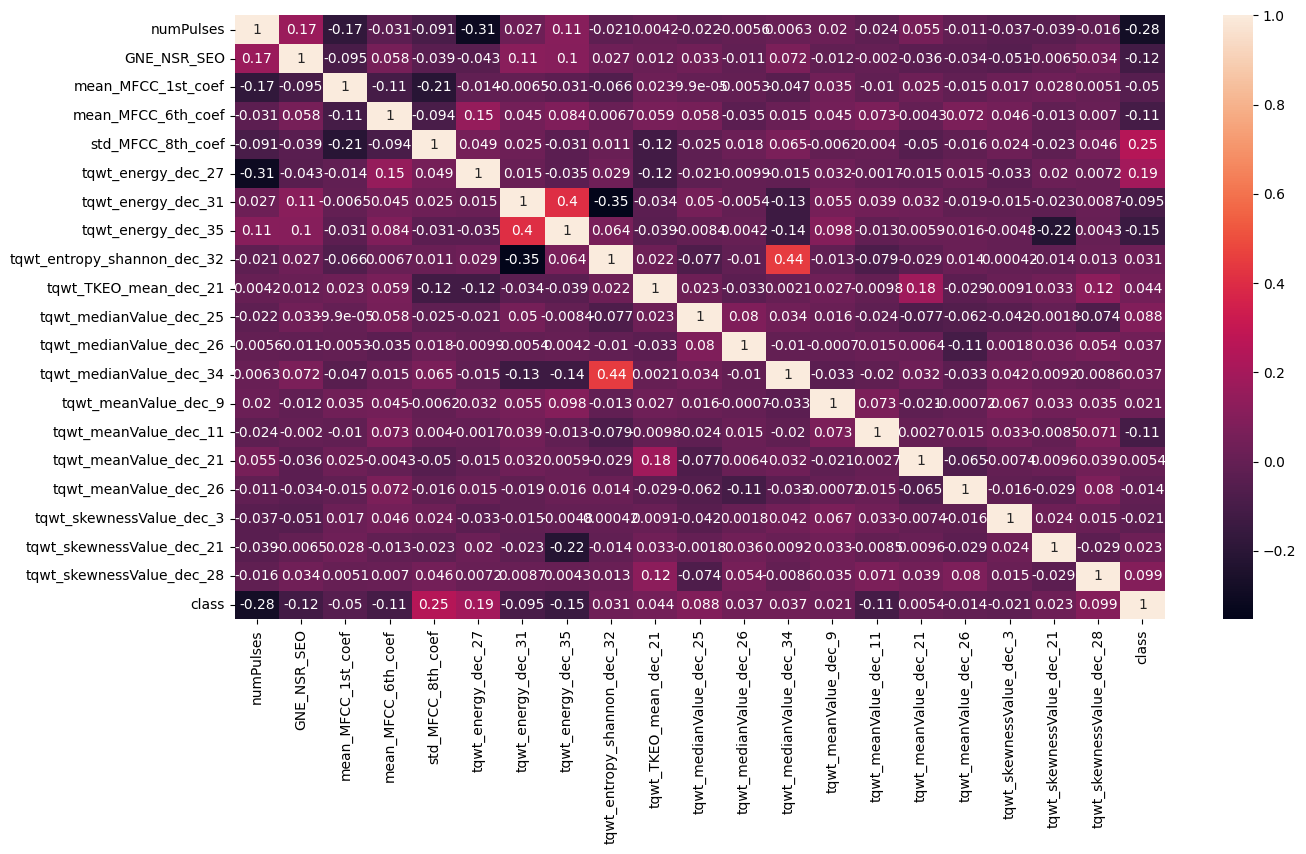

In [16]:
plt.figure(figsize=(15,8),dpi=100)
sns.heatmap(data.corr(),annot=True)

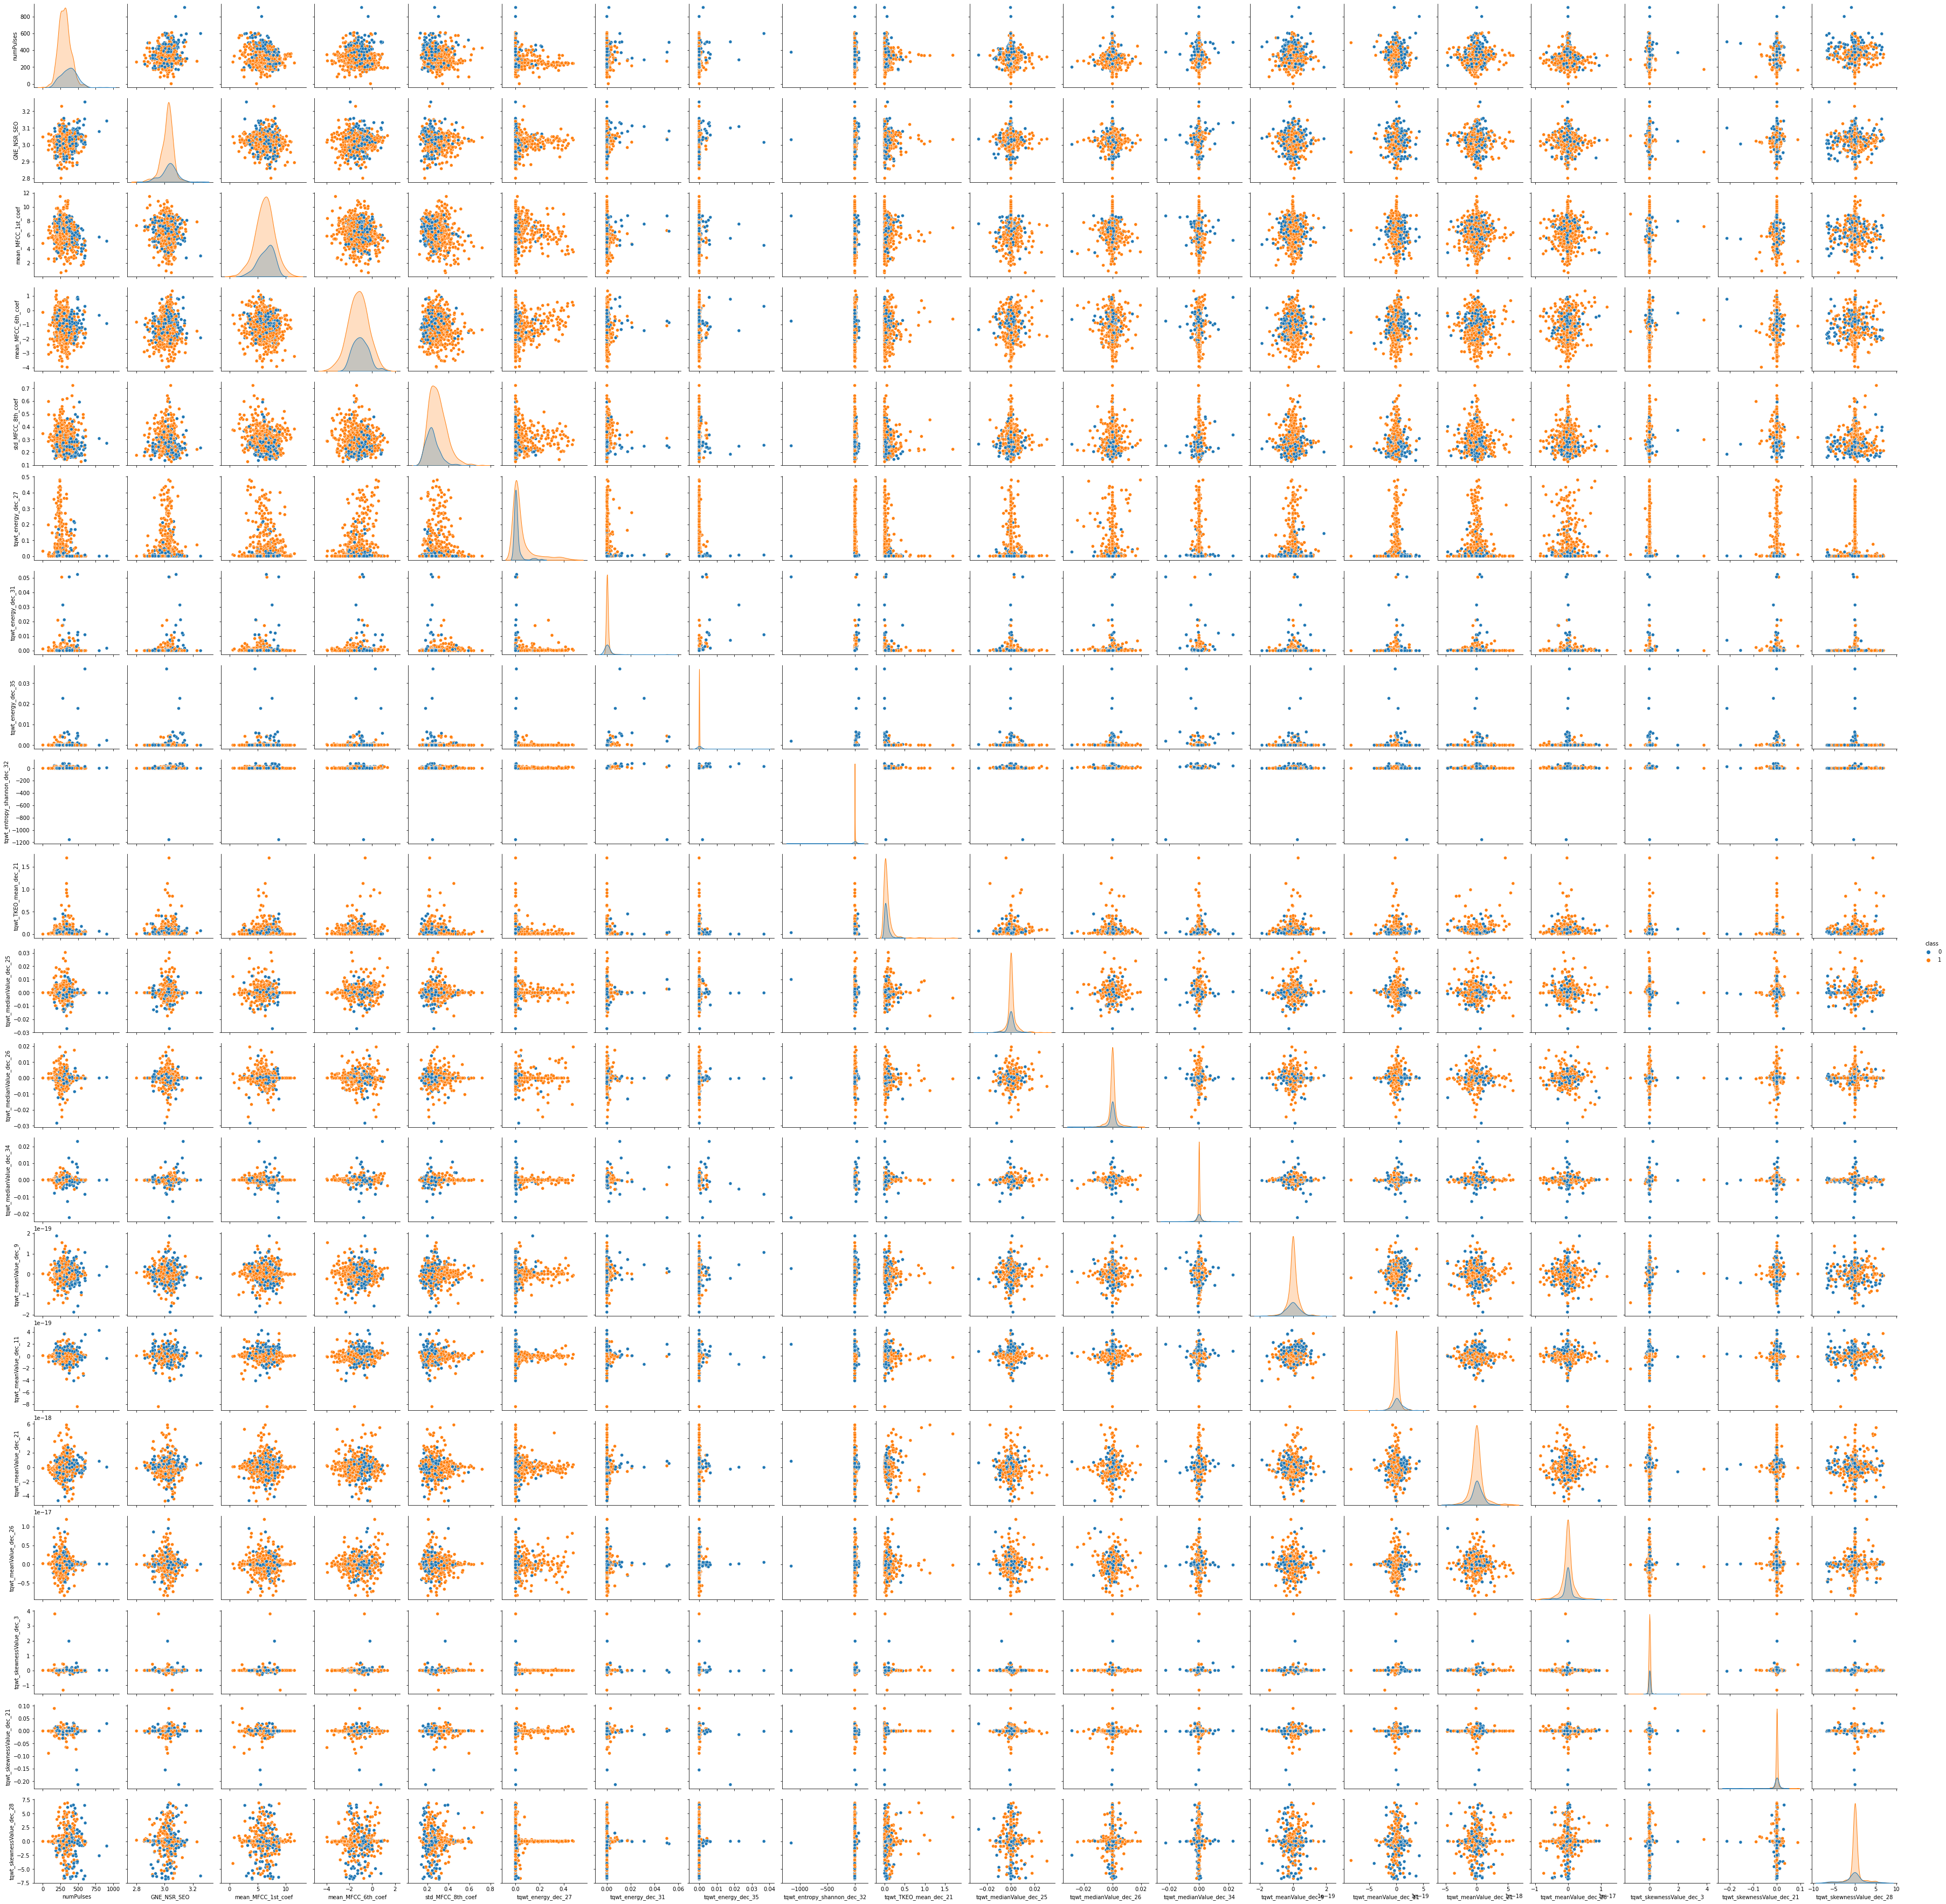

In [20]:
sns.pairplot(data,hue='class')

In [11]:
from sklearn.model_selection import train_test_split 

X = data.drop('class',axis=1)
y = data['class']

X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=28)

# Model fitting and eval metrics

In [25]:
import warnings 
warnings.filterwarnings("ignore")

In [22]:
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

model.fit(X_train, y_train)
pred = model.predict(X_test)

In [23]:
accuracy_score(pred,y_test)

0.8898678414096917

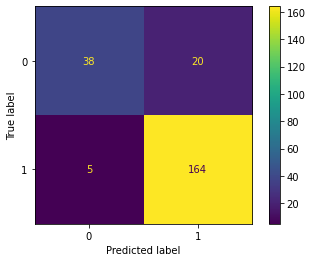

In [26]:
plot_confusion_matrix(model,X_test,y_test)

In [28]:
#Lets check the model is Overfitting or not

accuracy_score(model.predict(X_train),y_train)

1.0

from the insights we conculde that training_accuracy is 89% and the testing accuracy 100% . so the model is overfitted, we can try to minimise the modelcomplexity to reduce the False negative rate

In [31]:
classification_report(pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.66      0.88      0.75        43\n           1       0.97      0.89      0.93       184\n\n    accuracy                           0.89       227\n   macro avg       0.81      0.89      0.84       227\nweighted avg       0.91      0.89      0.90       227\n'

In [32]:
from sklearn.metrics import precision_score , recall_score , f1_score

print("Precison_Score : ",precision_score(pred,y_test))
print("Recall_Score : ",recall_score(pred,y_test))
print("F1_Score : ",f1_score(pred,y_test))

Precison_Score :  0.9704142011834319
Recall_Score :  0.8913043478260869
F1_Score :  0.9291784702549575


# Saving the model

In [33]:
from joblib import dump

import os

model_dir = 'models'
os.makedirs(model_dir,exist_ok=True)
filepath = os.path.join(model_dir,'final_model.joblib')
dump(model,filepath)

['models\\final_model.joblib']